In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [69]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [70]:
#checking columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

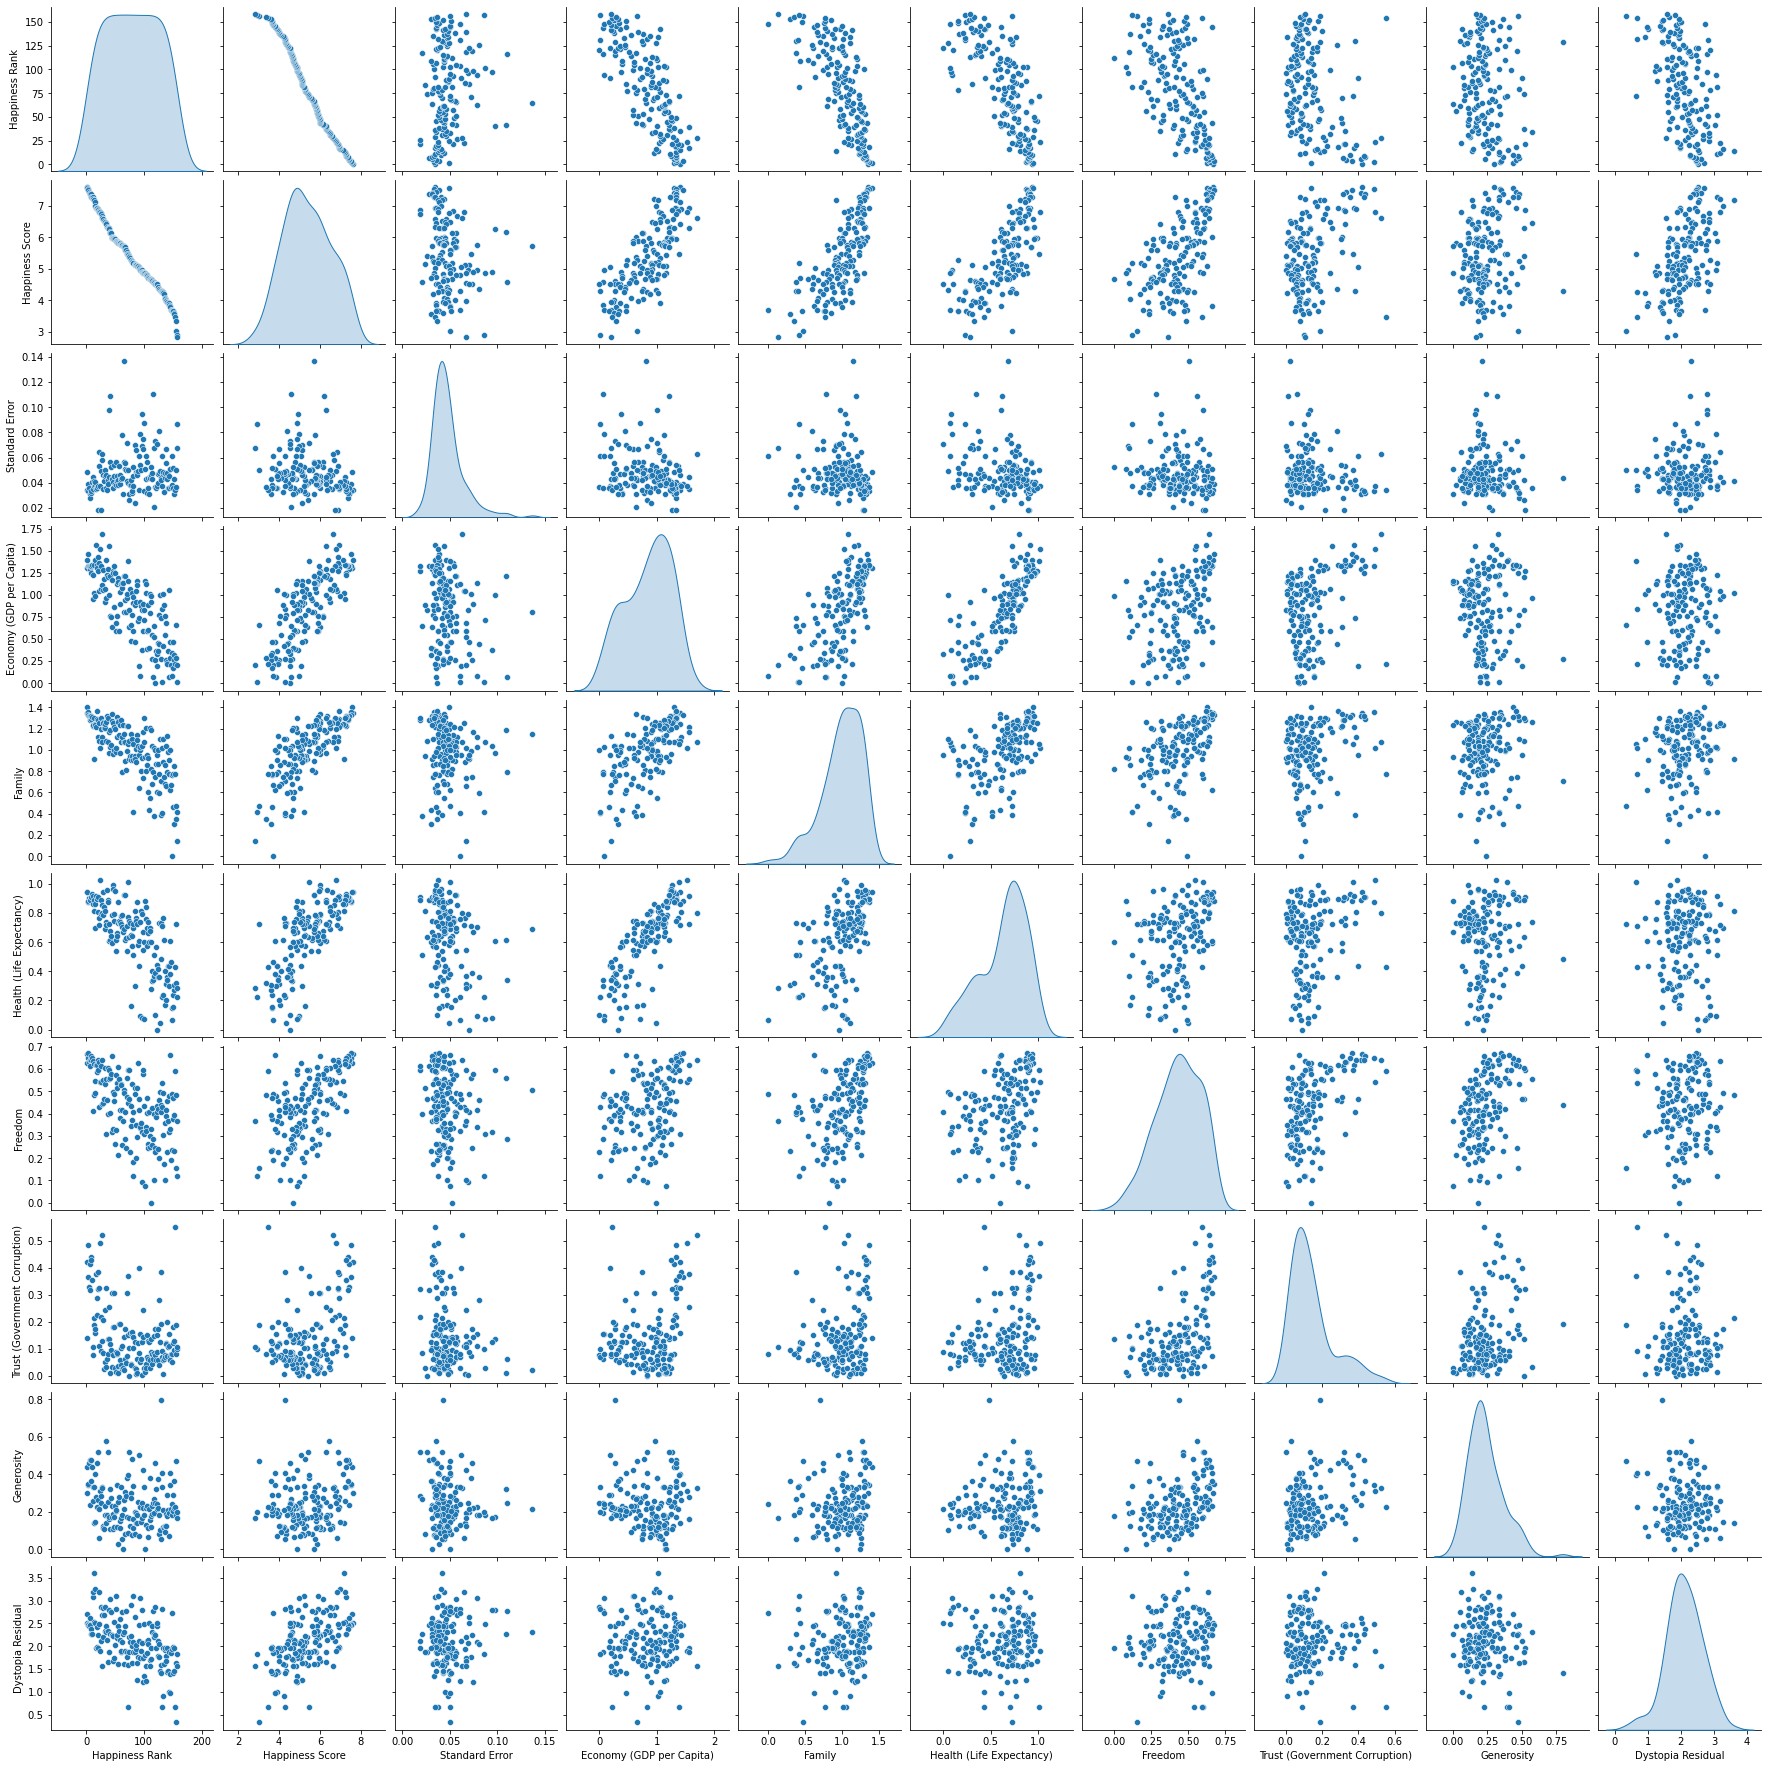

In [71]:
sns.pairplot(data=df, diag_kind='kde')

# Will check Description to find out skewness and Outliers

Here we can see Country,Region, Happiness Rank are not correlated with output of dataset Result. Its an Independent variable 
so we will drop this to avoid inaccuracy

In [72]:
#dropping the columns
df.drop(columns='Country',axis=1,inplace=True)
df.drop(columns='Region',axis=1,inplace=True)
df.drop(columns='Happiness Rank',axis=1,inplace=True)
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [73]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# checking null values

In [74]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No Null values are present in any column

# checking Outliers

Happiness Score                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Freedom                          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.257857,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

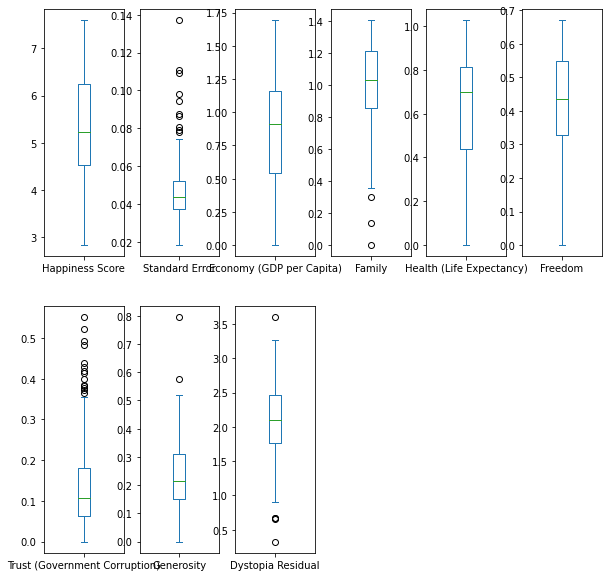

In [75]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [76]:
df['Standard Error'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.018480
0.1    0.033235
0.2    0.035978
0.3    0.038309
0.4    0.041758
0.5    0.043940
0.6    0.046892
0.7    0.050477
0.8    0.056116
0.9    0.067919
1.0    0.136930
Name: Standard Error, dtype: float64

In [77]:
df['Generosity'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.000000
0.1    0.106185
0.2    0.125528
0.3    0.169016
0.4    0.189492
0.5    0.216130
0.6    0.239330
0.7    0.280121
0.8    0.332068
0.9    0.412372
1.0    0.795880
Name: Generosity, dtype: float64

In [78]:
df['Dystopia Residual'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0    0.328580
0.1    1.456452
0.2    1.682550
0.3    1.860759
0.4    1.951822
0.5    2.095415
0.6    2.242662
0.7    2.410475
0.8    2.517554
0.9    2.801197
1.0    3.602140
Name: Dystopia Residual, dtype: float64

In [79]:
df['Trust (Government Corruption)'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])#Trust (Government Corruption)

0.0    0.000000
0.1    0.028650
0.2    0.052922
0.3    0.069915
0.4    0.084780
0.5    0.107220
0.6    0.130412
0.7    0.157353
0.8    0.203476
0.9    0.326539
1.0    0.551910
Name: Trust (Government Corruption), dtype: float64

# Removing Outliers using Z score

In [80]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))# abs will make it positive---> mod of x= x and -X---> if x=2 then mode of x=3 or x=-(-2)=2
z.shape

(158, 9)

In [81]:
thresold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [82]:
df_new=df[(z<3).all(axis=1)]

In [83]:
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# Checking Skewness

In [84]:
x=df_new.drop("Happiness Score",axis=1)
y=df_new['Happiness Score']

In [85]:
x.skew().sort_values(ascending=False)

Trust (Government Corruption)    1.272530
Standard Error                   1.243048
Generosity                       0.654710
Dystopia Residual               -0.021144
Economy (GDP per Capita)        -0.390657
Freedom                         -0.400867
Health (Life Expectancy)        -0.747711
Family                          -0.811340
dtype: float64

Two way to check Skewness
1. If Mean > 50% 
2.df.skew()

Hence above we can see the standard Error,Trust having High skewed Data

and Generosity and Family having low skewed Data.

# Removing Skwness using power_transform 

In [86]:
from sklearn.preprocessing import power_transform
x1=power_transform(x)

In [87]:
pd.DataFrame(x1).skew().sort_values(ascending=False)

5    0.174593
6    0.025172
7    0.014748
0   -0.031216
4   -0.076489
1   -0.140644
2   -0.148528
3   -0.190663
dtype: float64

In [88]:
pd.DataFrame(x1, columns = x.columns).skew().sort_values(ascending=False)

Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
Standard Error                  -0.031216
Freedom                         -0.076489
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
dtype: float64

In [89]:
x=pd.DataFrame(x1,columns=x.columns)

In [90]:
x.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual                0.014748
Standard Error                  -0.031216
Freedom                         -0.076489
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
dtype: float64

In [91]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


# Checking correlationship

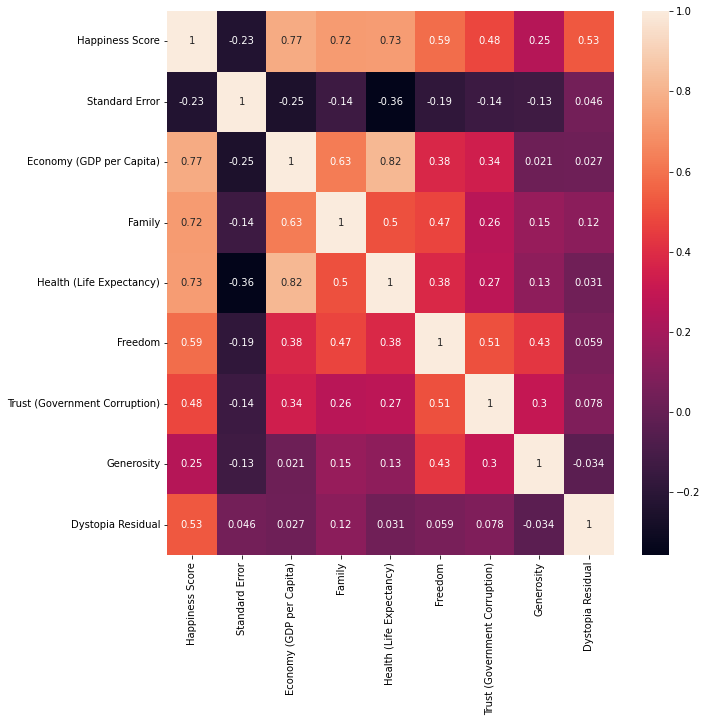

In [92]:
df_corr=df_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Here we can see almost all variables are corelated with output variable except standard error that almost equal to 0
hence we are going to drop any column

# Testing and Training

In [93]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030


In [94]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# StandardScaler

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [103]:
X_scaled

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [104]:
from sklearn.linear_model import LinearRegression

#x=df_new.drop("Happiness Score",axis=1)
#y=df_new['Happiness Score']

maxAcc = 0
maxRs=0

for i in range(1,140):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled,y,test_size=.20,random_state=i) #10
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=lm.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) #45 45

Best accuracy is 99.7754253260886 on Random state 60


In [105]:
#training and testing the data
x_train, x_test, y_train, y_test= train_test_split(X_scaled,y,test_size=0.20,random_state=60)

In [106]:
x_train.shape

(119, 8)

In [107]:
y_train.shape

(119,)

In [108]:
x_test.shape

(30, 8)

In [109]:
y_test.shape

(30,)

In [110]:
lm.fit(x_train,y_train)

LinearRegression()

In [111]:
pred=lm.predict(x_test)

In [112]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(99.7754253260886, 0.04818602571937105, 0.05485715486621567)

# using the cross validation

In [113]:
from sklearn.model_selection import KFold,cross_val_score

In [115]:
cross_val_score(lm,X_scaled,y)

array([0.87484049, 0.83238258, 0.78676002, 0.75418194, 0.8065964 ])

In [117]:
cross_val_score(LinearRegression(),X_scaled,y,cv=5).mean()

0.8109522873164184

In [118]:
print("predicted values",pred)
print("predicted values",y_test)

predicted values [6.52220157 4.25351503 3.94494729 4.62672456 3.86451605 5.6909824
 5.44432948 3.98941717 5.30880547 7.44710711 6.34256278 4.0745627
 5.76924262 5.8041992  6.93524791 6.31723012 6.36644648 5.79894211
 6.76445439 4.03604802 7.19298912 6.84171557 7.59580255 4.64421101
 5.06841131 5.89246584 4.23575287 4.75822437 5.11053553 3.72349831]
predicted values 30     6.505
132    4.252
139    3.956
116    4.565
141    3.904
61     5.759
72     5.429
138    3.989
74     5.360
4      7.427
38     6.295
136    4.033
65     5.695
50     5.890
15     6.983
34     6.411
36     6.302
55     5.833
23     6.798
135    4.077
14     7.119
19     6.901
3      7.522
112    4.642
86     5.123
47     5.975
129    4.297
108    4.694
81     5.192
146    3.681
Name: Happiness Score, dtype: float64


Here we can see the output and predicted values are almost matching

# Testing the one sample Data with Linear Regression

In [119]:
t=np.array([0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738]) 
# same data from first line which is having 7.5 output

In [120]:
t.shape

(8,)

In [121]:
t=t.reshape(1,-1)
t.shape

(1, 8)

In [122]:
lm.predict(t)

array([8.00187414])